Kidney Stone Classication using MRI 

In [ ]:
%pip install tensorflow
%pip install sklearn
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from random import shuffle
from tqdm import tqdm
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-pypi-packag

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


In [9]:
def plot_confusion_matrix(cm,
                          target_names,
                          model_name,            
                          title='Confusion Matrix',
                          cmap='coolwarm',       # More visible color map
                          normalize=True):
    """
    Enhanced confusion matrix plot with customization and save option.

    Arguments
    ---------
    cm:           Confusion matrix from sklearn.metrics.confusion_matrix

    target_names: List of class names such as ['Class1', 'Class2']

    model_name:   Name of the model to save the plot with

    title:        Title of the confusion matrix plot

    cmap:         Color map for the plot (default is 'coolwarm')

    normalize:    If True, show proportions instead of raw numbers

    Returns
    -------
    Saves the confusion matrix plot to a PNG file in the Kaggle working directory.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    # Compute accuracy and misclassification
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    plt.figure(figsize= (8, 6))  # Larger figure for better readability

    # Plot the confusion matrix with the new colormap
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=16, pad=20)
    plt.colorbar()

    # Remove grid lines
    plt.grid(False)

    # Set tick marks and labels
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45, fontsize=12)
        plt.yticks(tick_marks, target_names, fontsize=12)

    # Normalize the matrix if required
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    # Define the threshold for text color change
    thresh = cm.max() / 2.0
    
    # Add text annotations inside the matrix cells
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]:0.2f}" if normalize else f"{cm[i, j]:,}",
                 horizontalalignment="center",
                 verticalalignment="center",
                 color="white" if cm[i, j] > thresh else "black",
                 fontsize=12)

    # Layout improvements and label positioning
    plt.tight_layout()
    plt.ylabel('True Label', fontsize=14)
    plt.xlabel('Predicted Label', fontsize=14)

    # Save the plot with the model name
    file_name = f'{model_name}_confusion_matrix.png'
    plt.savefig(f'{file_name}', dpi=300, bbox_inches='tight')
    
    # Display the plot
    plt.show()

In [10]:
labels = ['Kidney_stone','Normal']

100%|██████████| 181/181 [00:01<00:00, 92.52it/s]


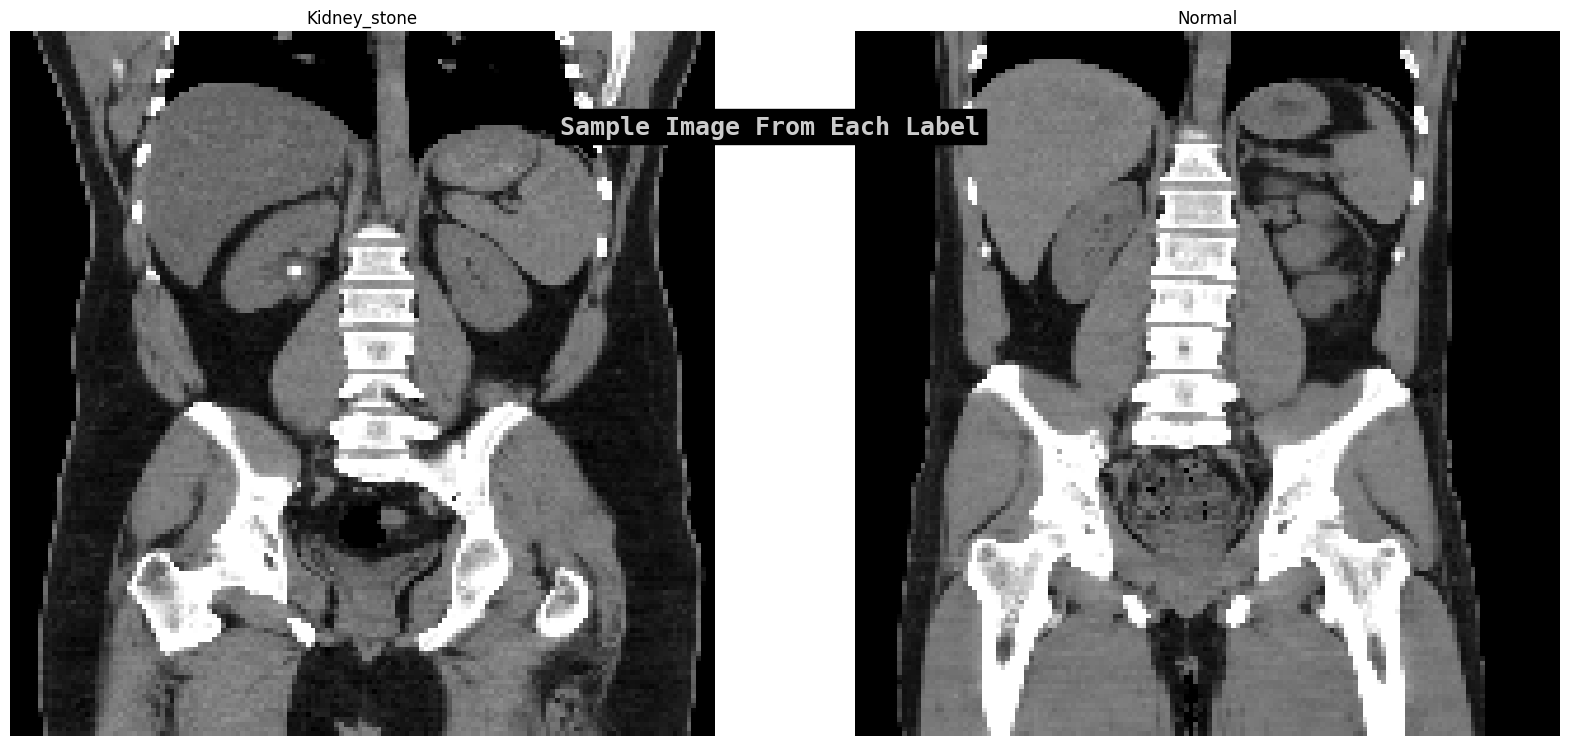

In [14]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# Set the image size and labels
image_size = 150
labels = ['Kidney_stone', 'Normal']  # Replace with actual labels

# Initialize empty lists for training and test data
X_train = []
y_train = []
X_test = []
y_test = []

# Load images from 'Train' directory
for i in labels:
    folderPath = os.path.join('Dataset', 'Train', i)  # Removed leading slash for relative path
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_train.append(img)
        y_train.append(i)

# Load images from 'Test' directory
for i in labels:
    folderPath = os.path.join('Dataset', 'Test', i)  # Removed leading slash for relative path
    for j in tqdm(os.listdir(folderPath)):
        img = cv2.imread(os.path.join(folderPath, j))
        img = cv2.resize(img, (image_size, image_size))
        X_test.append(img)
        y_test.append(i)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

# Plot sample images from each label
k = 0
fig, ax = plt.subplots(1, 2, figsize=(20, 20))
fig.text(s='Sample Image From Each Label', size=18, fontweight='bold', color='white',backgroundcolor='black',
         fontname='monospace', y=0.62, x=0.4, alpha=0.8)
for i in labels:
    j = 0
    while True:
        if y_train[j] == i:
            ax[k].imshow(X_train[j])
            ax[k].set_title(y_train[j])
            ax[k].axis('off')
            k += 1
            break
        j += 1

In [15]:
# Ensure y_train and y_test contain string labels before mapping to indices
y_train_new = []
for i in y_train:
    if isinstance(i, int):  # Convert numeric labels to string labels
        i = labels[i]
    y_train_new.append(labels.index(i))
y_train = y_train_new
y_train = tf.keras.utils.to_categorical(y_train)  # TensorFlow is already imported in CELL INDEX: 0

y_test_new = []
for i in y_test:
    if isinstance(i, int):  # Convert numeric labels to string labels
        i = labels[i]
    y_test_new.append(labels.index(i))
y_test = y_test_new
y_test = tf.keras.utils.to_categorical(y_test)  # TensorFlow is already imported in CELL INDEX: 0

In [16]:
# Inception V3 
incv3 = tf.keras.applications.InceptionV3(
    # final fully connected (dense) layers of the model (the "top")
    include_top=False,
    # Load pre-trained ImageNet(1000 classes) for avoiding training from scratch
    weights="imagenet",
    # create own layers
    input_tensor=None,
    #  Defines the shape of input images (height, width, channels).
    input_shape=None,
    # Outputs the last convolutional layer's 4D tensor
    pooling=None,
    # Sets the activation function for the top layer (only relevant if include_top=True).
    classifier_activation="softmax",
)

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


In [17]:
# build model on top of InceptionV3
model = incv3.output

model = tf.keras.layers.GlobalAveragePooling2D()(model)
model = tf.keras.layers.Dropout(rate=0.5)(model)
# binary classfication
model = tf.keras.layers.Dense(2,activation='softmax')(model)
# pass data train model 
model = tf.keras.models.Model(inputs=incv3.input, outputs = model)  

In [18]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None,      │          0 │ -                 │
│ (InputLayer)        │ None, 3)          │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, None,      │        864 │ input_layer[0][0] │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, None,      │         96 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation          │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, None,      │      9,216 │ activation[0][0]  │
│                     │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │         96 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_1        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 32)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, None,      │     18,432 │ activation_1[0][… │
│                     │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        192 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_2        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, None,      │          0 │ activation_2[0][… │
│ (MaxPooling2D)      │ None, 64)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, None,      │      5,120 │ max_pooling2d[0]… │
│                     │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        240 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_3        │ (None, None,      │          0 │ batch_normalizat… │
│ (Activation)        │ None, 80)         │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, None,      │    138,240 │ activation_3[0][… │
│                     │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, None,      │        576 │ conv2d_4[0][0]    │
│ (BatchNormalizatio… │ None, 192)        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_4        │ (None, None,      │          0 │ batch_normalizat

 Total params: 21,806,882 (83.19 MB)

 Trainable params: 21,772,450 (83.06 MB)

 Non-trainable params: 34,432 (134.50 KB)

In [19]:
# configures the training process for a deep learning model
model.compile(
  #how the model measures errors during training
  loss='categorical_crossentropy',
  #how the model updates its weights
  optimizer="adam",
  #how performance is monitored
  metrics=['accuracy']
)

In [21]:
# Traing the model
#validation_split = 0.2, 20% of the data will be used for validation
#epochs = 40, 40 iterations over the entire dataset
#batch_size = 32, 32 samples of the dataset will be used to estimate the error gradient

history = model.fit(X_train, y_train, validation_split = 0.2, epochs=50,batch_size=32,shuffle=True)

Epoch 1/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 43s 869ms/step - accuracy: 0.5958 - loss: 0.7980 - val_accuracy: 0.0000e+00 - val_loss: 13.4331
Epoch 2/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 821ms/step - accuracy: 0.7795 - loss: 0.4758 - val_accuracy: 0.1203 - val_loss: 35.8885
Epoch 3/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 826ms/step - accuracy: 0.8981 - loss: 0.2598 - val_accuracy: 0.9828 - val_loss: 0.0644
Epoch 4/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 30s 819ms/step - accuracy: 0.9361 - loss: 0.1514 - val_accuracy: 0.9966 - val_loss: 0.0038
Epoch 5/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 840ms/step - accuracy: 0.9651 - loss: 0.0812 - val_accuracy: 0.9863 - val_loss: 0.0326
Epoch 6/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 847ms/step - accuracy: 0.9623 - loss: 0.0880 - val_accuracy: 0.5464 - val_loss: 2.0751
Epoch 7/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 851ms/step - accuracy: 0.9910 - loss: 0.0262 - val_accuracy: 0.9691 - val_loss: 0.1314
Epoch 8/50
37/37 ━━━━━━━━━━━━━━━━━━━━ 32s 856ms/step - accuracy: 0.9805 - loss: 0.0493 - va

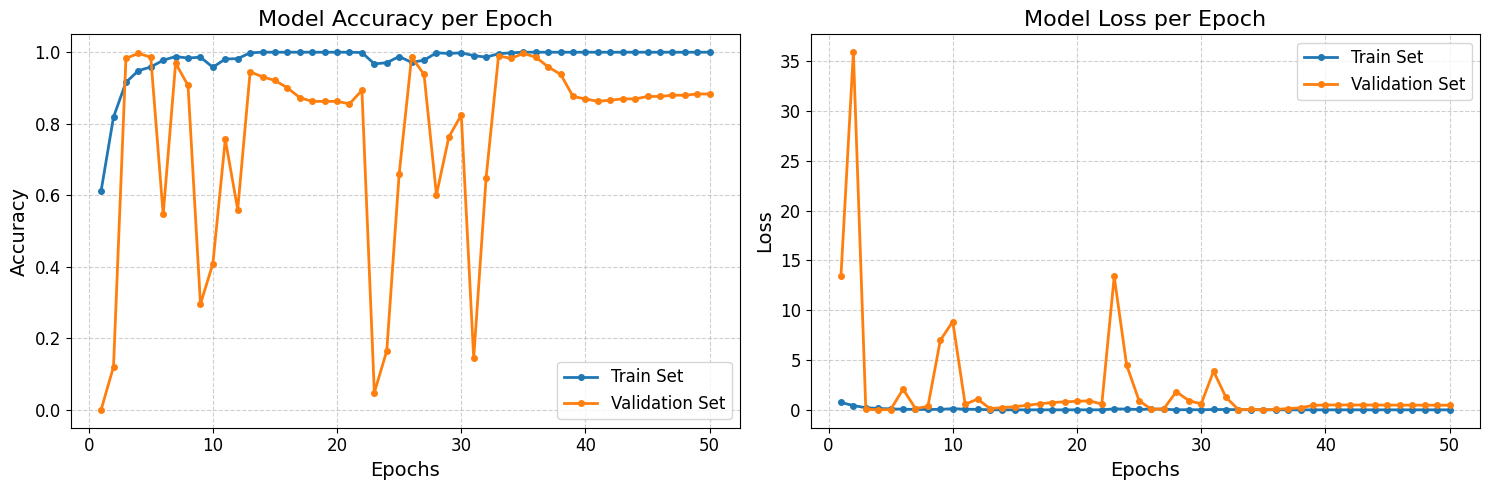

In [22]:
import matplotlib.pyplot as plt

# Assuming acc, val_acc, loss, val_loss, and epochs_range are defined
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(1, len(history.epoch) + 1)

# Set the size of the figure
plt.figure(figsize=(15, 5))

# Use a more professional style for the plots
# plt.style.available('seaborn-white')

# Define more muted and professional colors
train_color = '#1f77b4'  # Muted blue
val_color = '#ff7f0e'    # Muted orange

# Plot Accuracy with smaller dot points
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Set', color=train_color, linewidth=2, marker='o', markersize=4)
plt.plot(epochs_range, val_acc, label='Validation Set', color=val_color, linewidth=2, marker='o', markersize=4)
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title('Model Accuracy per Epoch', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)  # Finer grid lines for better aesthetics
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Plot Loss with smaller dot points
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Set', color=train_color, linewidth=2, marker='o', markersize=4)
plt.plot(epochs_range, val_loss, label='Validation Set', color=val_color, linewidth=2, marker='o', markersize=4)
plt.legend(loc="best", fontsize=12)
plt.xlabel('Epochs', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.title('Model Loss per Epoch', fontsize=16)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Save the figure as a high-resolution image
plt.tight_layout()
plt.savefig('Inception_performance.png', dpi=300)  # Save as a PNG file with 300 DPI
plt.show()

In [23]:
pred = model.predict(X_test)
pred = np.argmax(pred,axis=1)
y_test_new = np.argmax(y_test,axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 283ms/step


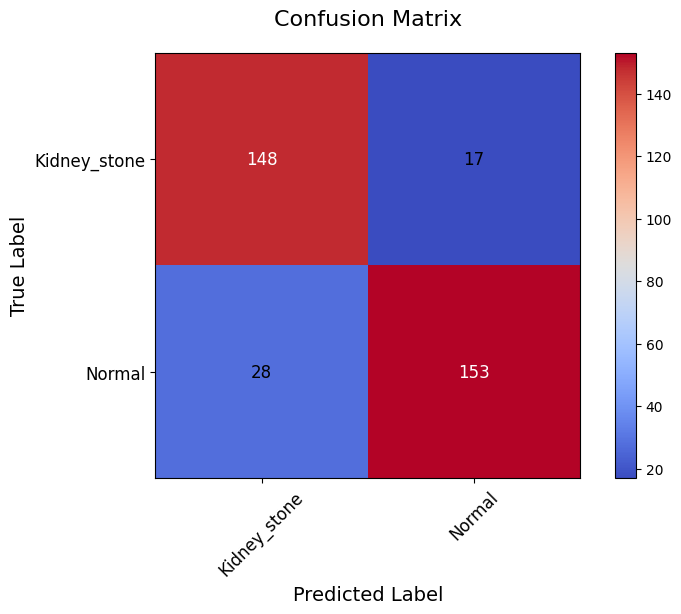

In [24]:
confusion_mtx = confusion_matrix(y_test_new,pred)
cm = plot_confusion_matrix(confusion_mtx, target_names = labels,model_name='Inception', normalize=False)

In [26]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Predict the class labels for X_test
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Assuming y_test is in categorical form (one-hot encoded), convert it to class labels
y_test_classes = np.argmax(y_test, axis=1)

# Calculate additional metrics
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes, average='binary')
recall = recall_score(y_test_classes, y_pred_classes, average='binary')
f1 = f1_score(y_test_classes, y_pred_classes, average='binary')

# Print the results
print(f"Accuracy: {np.round(accuracy * 100, 2)}%")
print(f"Precision: {np.round(precision * 100, 2)}%")
print(f"Recall: {np.round(recall * 100, 2)}%")
print(f"F1 Score: {np.round(f1 * 100, 2)}%")

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 162ms/step
Accuracy: 86.99%
Precision: 90.0%
Recall: 84.53%
F1 Score: 87.18%


In [28]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=['Kidney_stone', 'Normal']))



Classification Report:
              precision    recall  f1-score   support

Kidney_stone       0.84      0.90      0.87       165
      Normal       0.90      0.85      0.87       181

    accuracy                           0.87       346
   macro avg       0.87      0.87      0.87       346
weighted avg       0.87      0.87      0.87       346



In [29]:
# Save model for future use
model.save('kidney_stone_detectors(inceptionV3).h5')